# Pendahuluan

<p style="text-align:justify">Cartopy merupakan pustaka Python yang digunakan untuk proses pembuatan peta dan ditujukan untuk menggantikan pustaka basemap yang rencananya tidak akan diteruskan pada akhir tahun 2020 ini. Seperti pada basemap, Cartopy juga dijalankan di atas pustaka matplotlib. Cartopy bergantung pada beberapa pustaka Python lainnya seperti geos dan shapely, oleh karena itu instalasi menggunakan pip akan sangat sulit untuk dilakukan pemula. Maka dari itu, pada tutorial ini saya menyarankan kepada para pengguna untuk melakukan instalasi dengan menggunakan <a href="https://docs.conda.io/en/latest/miniconda.html">Miniconda 3</a>. Sesudah melakukan instalasi Miniconda 3, jalankan perintah sebagai berikut di Terminal pengguna masing - masing:</p>

```(bash)
conda install -c conda-forge cartopy
```

<p style="text-align:justify">Pada tutorial ini, penyusun juga akan menggunakan Jupyter Notebook sebagai lingkungan pengembangannya. Diharapkan pengguna juga menggunakan lingkungan pengembangan yang sama, oleh karena itu, jalankan perintah sebagai berikut di Terminal kalian masing - masing:</p>

```(bash)
conda install -c anaconda jupyter
```

Untuk memulai sesi Jupyter Notebook, jalankan perintah:
```(bash)
jupyter notebook
```

Maka secara otomatis peramban web bawaan kalian akan membuka sesi Jupyter Notebook.

# Membuat peta pertama

Hal pertama yang harus kita lakukan adalah mengimpor beberapa pustaka sebagai berikut:

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

<p style="text-align:justify">Pada baris pertama kita mengimpor modul pyplot di pustaka matplotlib (karena Cartopy dibangun di atas matplotlib) dan pada baris kedua kita mengimpor modul crs (<i>coordinate reference system</i>) pada pustaka Cartopy untuk melakukan pemetaan. Pada baris terakhir sendiri kita menjalankan perintah <i>magic</i> untuk menampilkan grafik matplotlib di Notebook tanpa perlu menjalankan perintah </p> <code>plt.show()</code> setiap kali hendak menampilkan grafik.</p>

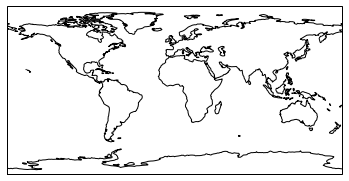

In [2]:
ax = plt.axes(projection=ccrs.PlateCarree()) # mendefinisikan proyeksi
ax.coastlines(); # menampilkan garis pantai

<p style="text-align:justify">Kemudian kita menggunakan gaya visualisasi berorientasi objek pada matplotlib dengan mendefinisikan sumbu dengan proyeksi dua dimensi (<i>Plate Carrée</i>) dan kemudian menampilkan garis pantai pada peta tersebut. Secara <i>default</i> latar belakang yang ditampilkan berwarna putih. Untuk menampilkan latar belakang yang berwarna, kita dapat menjalankan metode <code>stock_img</code> pada objek <code>ax</code>.

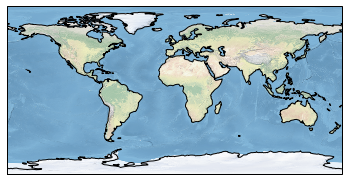

In [3]:
ax = plt.axes(projection=ccrs.PlateCarree()) # mendefinisikan proyeksi
ax.coastlines(); # menampilkan garis pantai
ax.stock_img(); # menampilkan peta berwarna

Kemudian kita akan mencoba menampilkan lokasi penyusun bermukim saat ini di Desa Krimun, Losarang, Indramayu, Jawa Barat (108.157691, -6.388166) dengan menggunakan <i>scatterplot</i>:

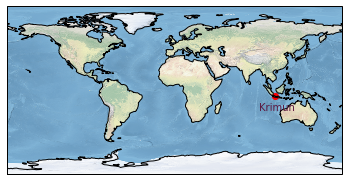

In [4]:
ax = plt.axes(projection=ccrs.PlateCarree()) # mendefinisikan proyeksi
ax.coastlines(); # menampilkan garis pantai
ax.stock_img(); # menampilkan peta berwarna

# Koordinat Desa Krimun, Losarang, Indramayu, Jawa Barat
bujur = 108.157691
lintang = -6.388166

plt.scatter(bujur, lintang, color='red'); # menampilkan titik berwarna merah
# menampilkan teks Krimun dgn jarak beberapa inci dari titik
plt.text(bujur - 17, lintang - 15, 'Krimun', color='#5c1a41'); 

Untuk mengatur ukuran peta, kita dapat menggunakan metode `figure()` di modul pyplot di bagian awal <i>script</i> dengan menambahkan argumen <code>figsize</code> dalam bentuk <i>tuple</i> <code>(lebar, tinggi)</code> dalam satuan inci dalam kasus ini ukuran peta adalah $12\times 10$ inci: 

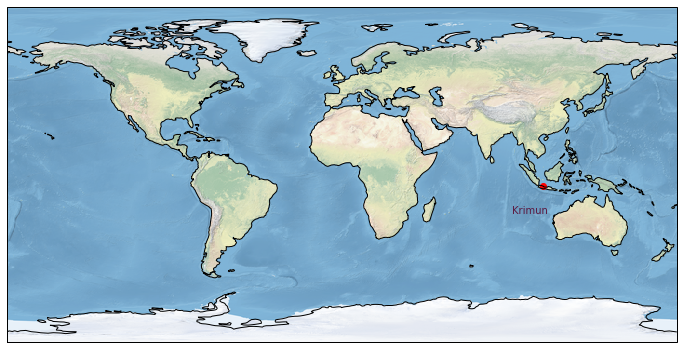

In [5]:
plt.figure(figsize=(12,10))
ax = plt.axes(projection=ccrs.PlateCarree()) # mendefinisikan proyeksi
ax.coastlines(); # menampilkan garis pantai
ax.stock_img(); # menampilkan peta berwarna

# Koordinat Desa Krimun, Losarang, Indramayu, Jawa Barat
bujur = 108.157691
lintang = -6.388166

plt.scatter(bujur, lintang, color='red'); # menampilkan titik berwarna merah
# menampilkan teks Krimun dgn jarak beberapa inci dari titik
plt.text(bujur - 17, lintang - 15, 'Krimun', color='#5c1a41'); 

# Sekilas tentang proyeksi peta

<p style="text-align:justify">Ketika menampilkan permukaan bumi yang bersifat 3D ke lembar peta 2D, maka pasti terjadi distorsi. Oleh karena itu, untuk mengurangi distorsi tersebut terdapat berbagai macam proyeksi yang dapat digunakan. Suatu peta yang ideal harus memenuhi ketiga syarat sebagai berikut:</p>

* <p style="text-align:justify"><i>Conformal</i>: artinya adalah suatu proyeksi peta yang ideal harus mempertahankan fitur asli dari rupa bumi, utamanya pada kemiringan sudutnya (namun berbeda pada fitur luasan dan panjang rupa bumi).</p>
* <p style="text-align:justify"><i>Equal area</i> : Proyeksi yang bersifat <i>equal area</i> merupakan proyeksi yang merujuk pada luasan yang sama antara di peta dengan rupa bumi aslinya (namun terdapat distorsi pada bentuk, sudut, dan/atau skalanya). </p>
* <p style="text-align:justify"><i>Equidistant</i>: Proyeksi yang bersifat <i>equidistant</i> adalah proyeksi yang mempertahankan kesamaan jarak dari bagian tengah peta, dengan kata lain panjang jarak antar meridian harus seragam.</p>

Namun, tidak ada satupun proyeksi peta yang dapat memenuhi ketiga syarat ideal tersebut.

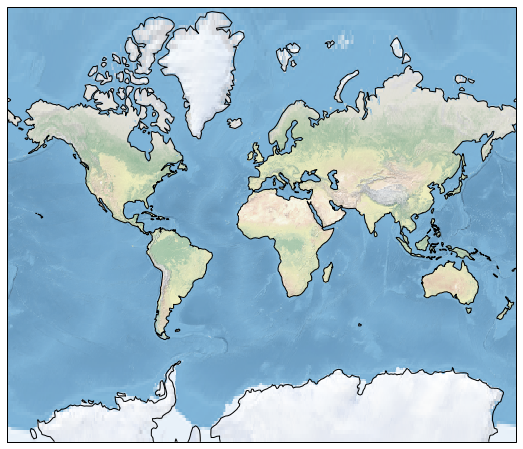

In [6]:
# Contoh proyeksi dengan sifat conformal, yakni Mercator
plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines();
ax.stock_img();

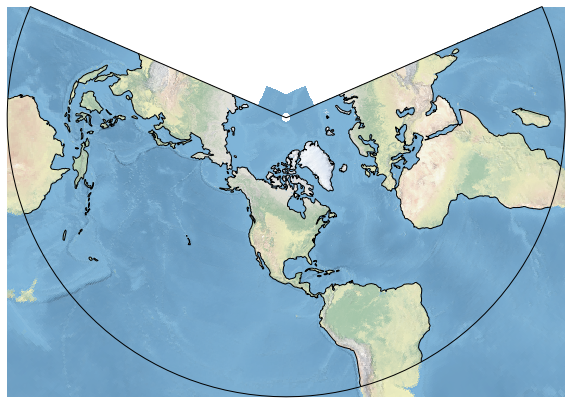

In [7]:
# Contoh proyeksi dengan sifat conformal, yakni LambertConformal
plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.LambertConformal())
ax.coastlines();
ax.stock_img();

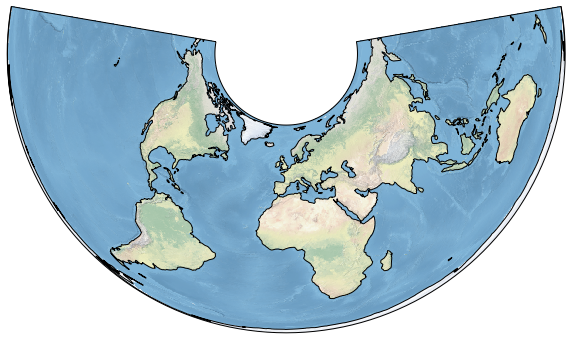

In [8]:
# Contoh proyeksi dengan sifat equal area, yakni AlbersEqualArea
plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.AlbersEqualArea())
ax.coastlines();
ax.stock_img();

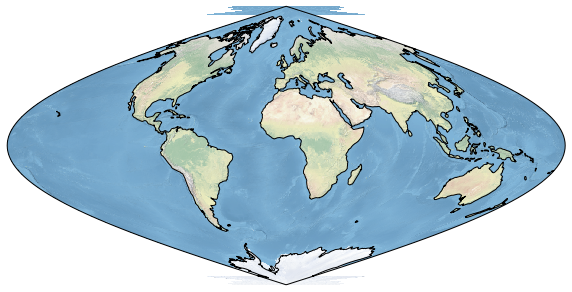

In [9]:
# Contoh proyeksi dengan sifat equal area, yakni Sinusoidal
plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.Sinusoidal())
ax.coastlines();
ax.stock_img();

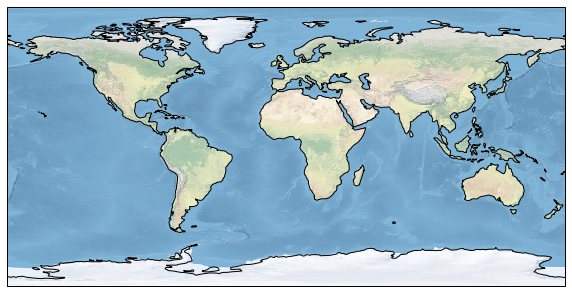

In [10]:
# Contoh proyeksi dengan sifat equidistant, yakni PlateCarree
plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines();
ax.stock_img();

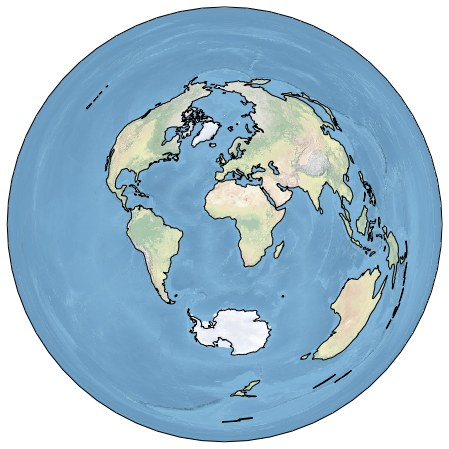

In [11]:
# Contoh proyeksi dengan sifat equidistant, yakni AzimuthalEquidistant
plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.AzimuthalEquidistant())
ax.coastlines();
ax.stock_img();

Untuk mempelajari lebih lanjut soal proyeksi peta, pembaca disarankan untuk mengunjungi situs:
<url>https://scitools.org.uk/cartopy/docs/latest/crs/projections</url>

Namun, jika pembaca masih belum paham kepentingan penggunaan proyeksi yang spesifik, disarankan untuk menggunakan proyeksi <i>Plate Carrée</i>.

# Menambahkan fitur pada peta

<p style="text-align:justify">Pada bagian ini kita akan mempelajari cara menambahkan fitur - fitur, seperti garis pantai; perbatasan negara; daratan; danau; sungai; dan laut. Selain itu kita juga akan mempelajar cara menambahkan latarbelakang dan <i>grid</i> pada peta, serta memotong peta pada wilayah geografis yang kita kehendaki.</p>

Untuk menambahkan fitur, kita perlu mengimpor modul feature dari pustaka Cartopy.

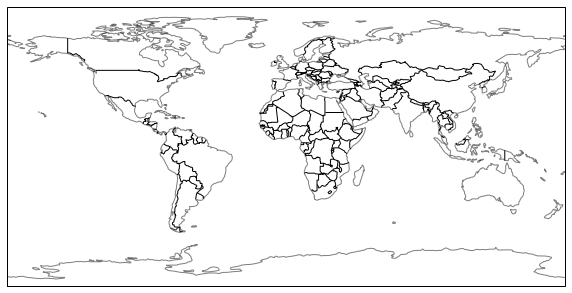

In [20]:
import cartopy.feature as cf

plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())
# menambahkan fitur garis pantai dengan transparansi 50%
ax.add_feature(cf.COASTLINE, alpha=.5); 
# menambahkan fitur  dengan transparansi 50%
ax.add_feature(cf.BORDERS, alpha=.8);
